In [49]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [13]:
# Load datasets and parse date column
london_weather_data = pd.read_csv("./london_weather.csv", parse_dates = ['date'])
stock_dataset = pd.read_csv("./Index closing price from 1994 to 2021.csv", parse_dates = ['Date'])

In [14]:
london_weather_data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [16]:
stock_dataset.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1,1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
2,1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
3,1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
4,1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


In [51]:
# CHECK NUMBER OF NA VALUES FOR ALL COLUMNS
london_weather_data.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [20]:
# CHECK NUMBER OF NA VALUES FOR ALL COLUMNS
stock_dataset.isna().sum()

Date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [22]:
# CHECK DATATYPES OF ALL THE COLUMNS
london_weather_data.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [24]:
# CHECK DATATYPES OF ALL THE COLUMNS
stock_dataset.dtypes

Date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [29]:
len(london_weather_data)

15341

In [30]:
len(stock_dataset)

7255

In [34]:
stock_dataset.shape

(7255, 5)

In [36]:
london_weather_data.shape

(15341, 10)

In [37]:
# FIND MEAN OF ALL NUMERICAL COLUMNS
london_weather_data[['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']].mean()

cloud_cover              5.268242
sunshine                 4.350238
global_radiation       118.756951
max_temp                15.388777
mean_temp               11.475511
min_temp                 7.559867
precipitation            1.668634
pressure            101536.605594
snow_depth               0.037986
dtype: float64

In [38]:
# FIND STANDARD DEVIATION OF ALL NUMERICAL COLUMNS
london_weather_data[['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']].std()

cloud_cover            2.070072
sunshine               4.028339
global_radiation      88.898272
max_temp               6.554754
mean_temp              5.729709
min_temp               5.326756
precipitation          3.738540
pressure            1049.722604
snow_depth             0.545633
dtype: float64

In [40]:
# FIND MEDIAN OF ALL NUMERICAL COLUMNS
london_weather_data[['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']].median()

cloud_cover              6.0
sunshine                 3.5
global_radiation        95.0
max_temp                15.0
mean_temp               11.4
min_temp                 7.8
precipitation            0.0
pressure            101620.0
snow_depth               0.0
dtype: float64

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')
date


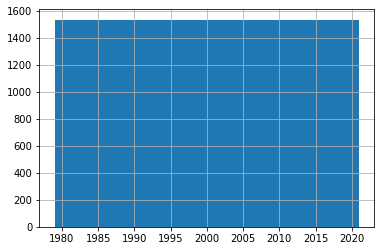

cloud_cover


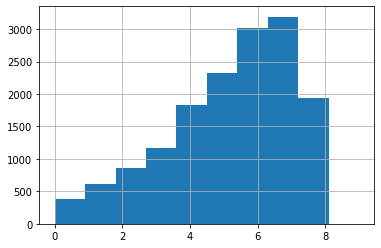

sunshine


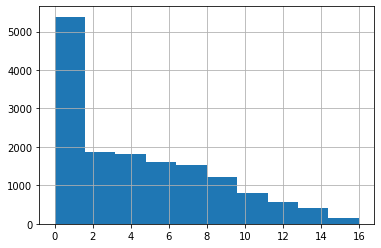

global_radiation


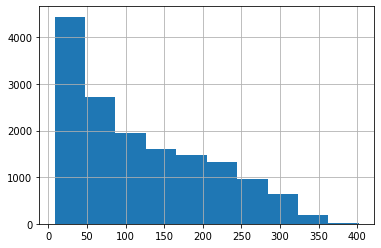

max_temp


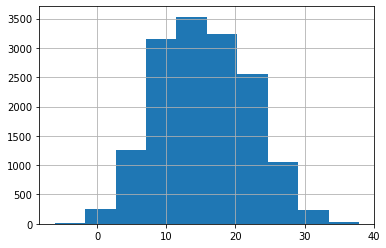

mean_temp


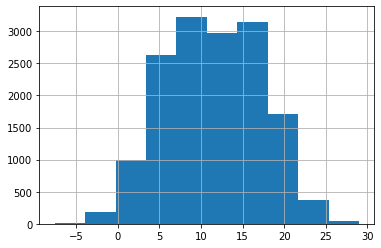

min_temp


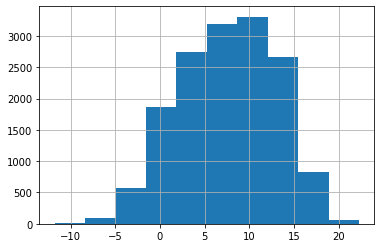

precipitation


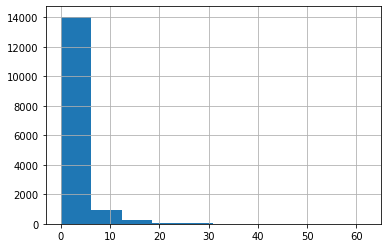

pressure


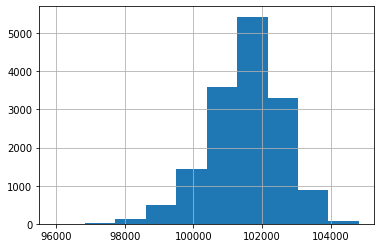

snow_depth


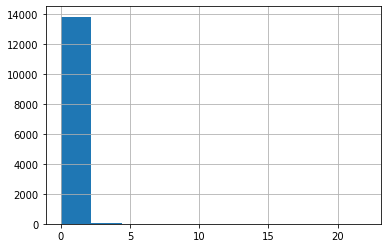

In [46]:
# LOAD HISTOGRAMS OF ALL COLUMNS
cols = london_weather_data.columns
print(cols)
for col in cols:
    london_weather_data[col].hist()
    print(col)
    plt.show()
    

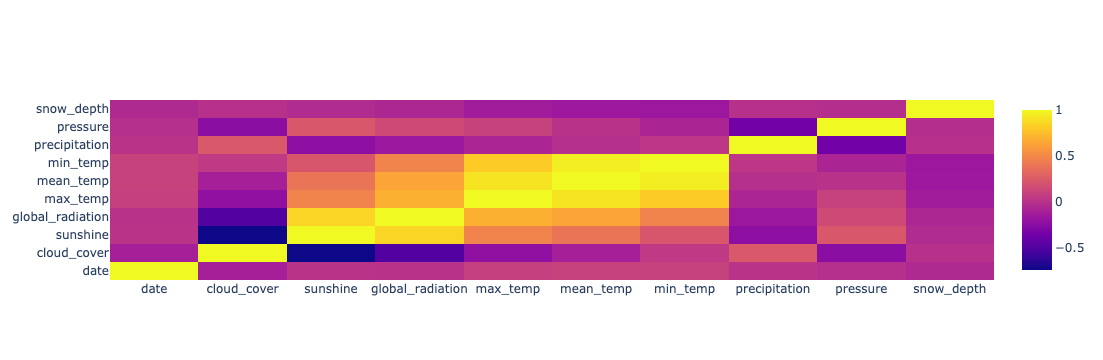

In [19]:
# PLOT HEATMAP OF CORRELATION BETWEEN ALL PAIRS OF COLUMNS
correl = london_weather_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')